In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
plt.style.use('ggplot')

In [2]:
df = pd.read_csv("../data/housing_data.csv")

In [3]:
df.shape

(506, 14)

In [4]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

There are 14 attributes in each case of the dataset. They are:

CRIM - per capita crime rate by town

ZN - proportion of residential land zoned for lots over 25,000 sq.ft.

INDUS - proportion of non-retail business acres per town.

CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

NOX - nitric oxides concentration (parts per 10 million)

RM - average number of rooms per dwelling

AGE - proportion of owner-occupied units built prior to 1940

DIS - weighted distances to five Boston employment centres

RAD - index of accessibility to radial highways

TAX - full-value property-tax rate per $10,000

PTRATIO - pupil-teacher ratio by town

B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town

LSTAT - % lower status of the population

MEDV - Median value of owner-occupied homes in $1000's

<Figure size 1500x400 with 0 Axes>

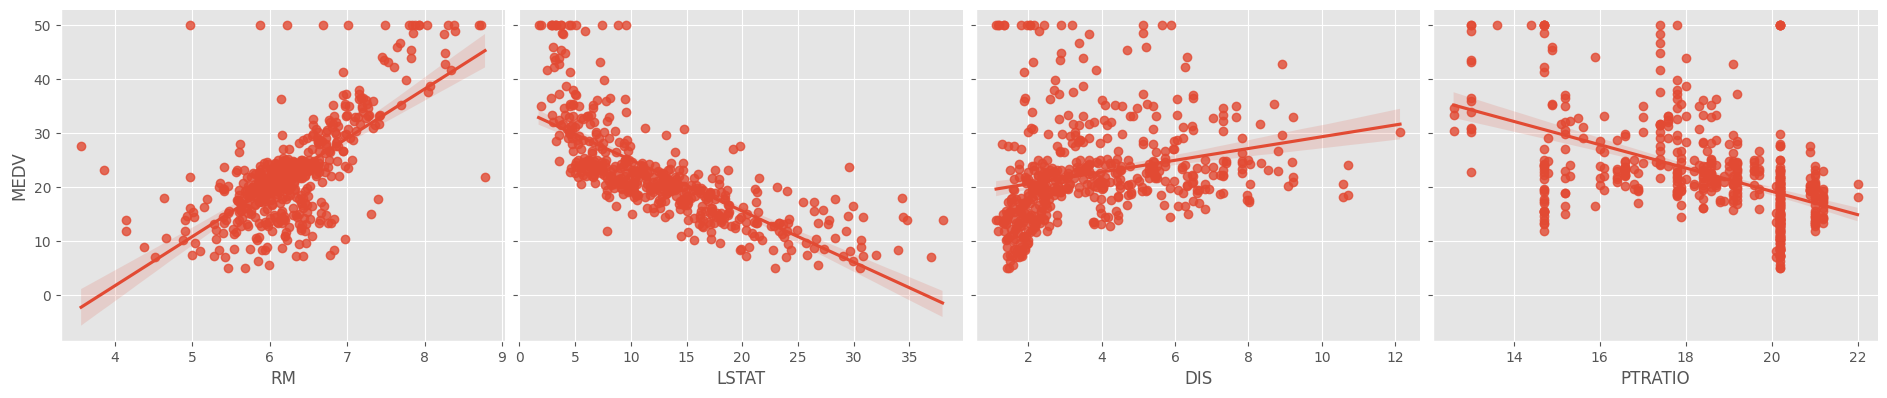

In [5]:
plt.figure(figsize=(15, 4))
sns.pairplot(df,
    x_vars=['RM', 'LSTAT', 'DIS', 'PTRATIO'],
    y_vars=['MEDV'],
    kind='reg',
    height=4,
    aspect=1.2)

plt.show()

As we can see here I've hand picked some of the variables of the dataset which can have a strong-medium level of corellation 

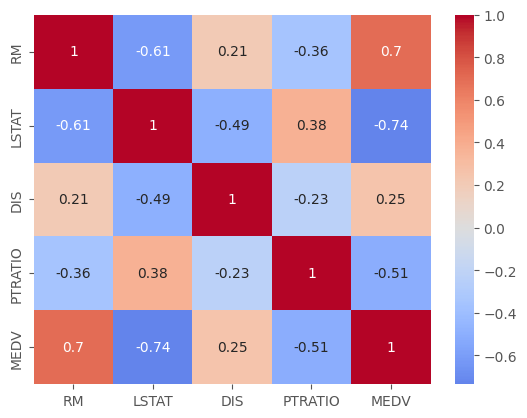

In [6]:
# Simple correlation matrix
correlation_matrix = df[['RM', 'LSTAT', 'DIS', 'PTRATIO', 'MEDV']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.show()

Checking for Multicollinearity, this is important as if features are highly correlated it can be hard to find the indivisual contribution of each variable on the target

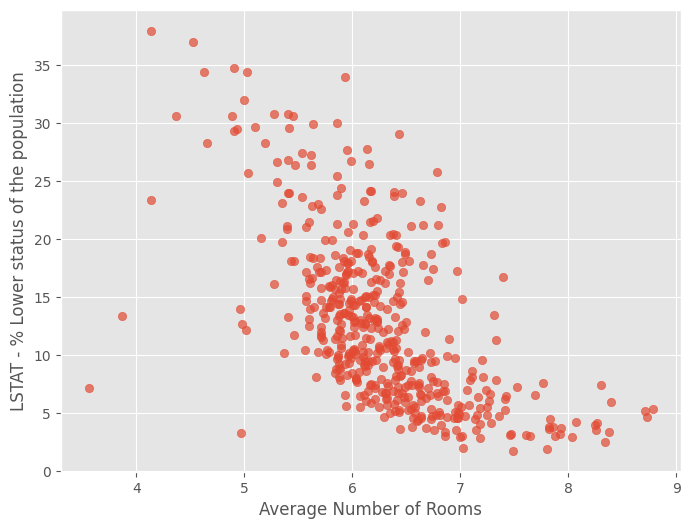

In [7]:
plt.figure(figsize=(8, 6))
plt.scatter(df['RM'], df['LSTAT'], alpha=0.7)
plt.xlabel('Average Number of Rooms')
plt.ylabel('LSTAT - % Lower status of the population')
plt.show()

There is a -0.61 correlation between average number of rooms and % of lower status of the population, this should be be fine but just something to keep mind of.

In [8]:
features = df[['RM', 'LSTAT', 'DIS', 'PTRATIO']].values
target = df[['MEDV']].values

Removing the nan values to be used for gradient descent, we're only going to lose about 5% of values so it should be fine, however this could of course mean that were the data isn't avaliable had a reason which won't be accounted for

In [9]:
mask = ~np.isnan(features).any(axis=1)
features = features[mask]
target = target[mask]

In [10]:
def dJ_dtheta(m, X, theta, y):
    return (1/m) * X.T @ (X @ theta - y)

In [11]:
features = np.c_[np.ones(features.shape[0]), features] # Add a column of ones for the bias terms to be multiplied by

In [12]:
learning_rate = 0.001
iterations = 2000000

In [13]:
def train(features, target, learning_rate, iterations):
    theta = np.zeros((features.shape[1], 1))
    m = len(features)
    for _ in range(iterations):
        theta = theta - learning_rate * dJ_dtheta(m, features, theta, target)
        
    return theta
    

theta = train(features, target, learning_rate, iterations)
theta
    

array([[24.95076525],
       [ 4.15389706],
       [-0.66167764],
       [-0.54428969],
       [-0.98223574]])

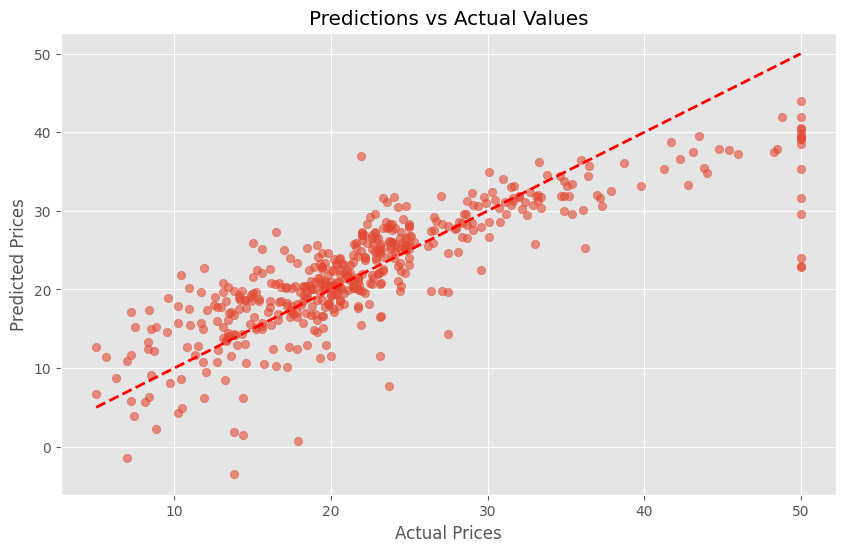

In [14]:
import matplotlib.pyplot as plt

predictions = features @ theta

plt.figure(figsize=(10, 6))
plt.scatter(target, predictions, alpha=0.6)
plt.plot([target.min(), target.max()], [target.min(), target.max()], 'r--', lw=2)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Predictions vs Actual Values')
plt.show()

# Perfect predictions would lie on the red diagonal line